Calculated average for Informatyka = 4.285714285714286
Calculated average for Izabela Nowak = 4.0


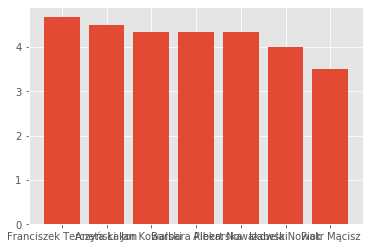

Student ranking for Informatyka:
   lp  Uczeń                         Średnia   
    1. Barbara Piekarska              5.00
    2. Franciszek Terczyński          5.00
    3. Aneta Łakon                    4.50
    4. Izabela Nowak                  4.00
    5. Jan Kowalski                   4.00
    6. Albert Nowakowski              4.00
    7. Piotr Mącisz                   3.50
Student ranking for all subjects:
   lp  Uczeń                         Średnia   
    1. Franciszek Terczyński          4.67
    2. Aneta Łakon                    4.50
    3. Jan Kowalski                   4.33
    4. Barbara Piekarska              4.33
    5. Albert Nowakowski              4.33
    6. Izabela Nowak                  4.00
    7. Piotr Mącisz                   3.50


In [126]:
import matplotlib.pyplot as plt
from openpyxl import load_workbook
from openpyxl import Workbook

##################################################################

def calculateAverageForSubject(subject): 
    # wylicza średnią ocen dla danego przedmiotu
    sum_of_marks = 0
    wb = load_workbook('oceny/oceny-grupa1.xlsx')
    sheet=wb[subject]
    for i in range(1, sheet.max_row  + 1):
        sum_of_marks += sheet.cell(row=i, column=2).value
    return sum_of_marks/i
    

def calculateAverageForStudent(student):
    #wylicza średnią ocen ze wszystkich przedmiotów dla danego studenta
    sum_of_marks = 0
    sheet_count = 0
    wb = load_workbook('oceny/oceny-grupa1.xlsx')
    for sheet in wb.sheetnames:
        for i in range(1, wb[sheet].max_row  + 1):
            if wb[sheet].cell(row=i, column=1).value == student:
                sum_of_marks += wb[sheet].cell(row=i, column=2).value
                sheet_count += 1
    return(sum_of_marks/sheet_count)
    

def calculateAverageForAllSubjects():
    #wylicza średnią ocen wszystkich uczniów dla wszystkich przedmiotów 
    #z generacją wykresu słupkowego posortowanego wg średnich
    dataset = {}
    for student in studnet_list():
        dataset[student]= sum(student_marks(student))/len(student_marks(student))
    
    sorted_dataset = {k: v for k, v in sorted(dataset.items(), key=lambda item: item[1], reverse=True)}

    names = sorted_dataset.keys()
    values = sorted_dataset.values()
    plt.style.use('ggplot')
    plt.bar(names,values)
    plt.show()
    
        
def generateStudentRankingForSubject(subject):
    #wylicza ranking uczniów w danym przedmiocie. Ranking oczywiście ma być wyznaczany na podstawie ocen, 
    #najwyższe oceny na początku
    dataset = {}
    wb = load_workbook('oceny/oceny-grupa1.xlsx')
    sheet=wb[subject]
    for row in range(1, sheet.max_row  + 1):
        student = sheet.cell(row=row, column=1).value
        dataset[student] = sheet.cell(row=row, column=2).value
        sorted_dataset = {k: v for k, v in sorted(dataset.items(), key=lambda item: item[1], reverse=True)}
    return(sorted_dataset) # zwraca posortowaną po ocenach bibliotekę {uczeń: ocena}


def generateStudentRankingForAllSubjects():
    #wyliczającej ranking uczniów na podstawie średniej ocen ze wszystkich przedmiotów, 
    #najlepsi studenci na początku
    dataset = {}
    for student in studnet_list():
        dataset[student]= sum(student_marks(student))/len(student_marks(student))
    
    sorted_dataset = {k: v for k, v in sorted(dataset.items(), key=lambda item: item[1], reverse=True)}
    
    return sorted_dataset # zwraca posortowaną po średniej ocen bibliotekę {uczeń: średnia}

##################################################################
    ##pomocnicze
    
def studnet_list():
    #zwraca listę uczniów
    studentlist = []
    wb = load_workbook('oceny/oceny-grupa1.xlsx')
    sheet = wb["Matematyka"]
    for row in range(1, sheet.max_row  + 1):
        studentlist.append(sheet.cell(row, column=1).value)
    return(studentlist)

def student_marks(student):
    #zwraca listę ocen danego ucznia
    studentmarks = []
    wb = load_workbook('oceny/oceny-grupa1.xlsx')
    for sheet in wb.sheetnames:
        for i in range(1, wb[sheet].max_row  + 1):
            if wb[sheet].cell(row=i, column=1).value == student:
                studentmarks.append(wb[sheet].cell(row=i, column=2).value)
    return(studentmarks)

def ranking_list(dataset):
    #formatka do rankingów
    i=1
    print("{:5} {:30} {:10}".format("   lp", " Uczeń", "Średnia"))
    for data in dataset:
        print("{:5}. {:30} {:1.2f}".format(i, data, dataset[data]))
        i+=1
        
###################################################################

def main():
    subject = "Informatyka"
    student = "Izabela Nowak"
    
    print(("Calculated average for {} = {}").format(subject, calculateAverageForSubject(subject)))
    print(("Calculated average for {} = {}").format(student, calculateAverageForStudent(student)))
    calculateAverageForAllSubjects()
    
    print("Student ranking for {}:".format(subject))
    ranking_list(generateStudentRankingForSubject(subject))
    
    print("Student ranking for all subjects:")
    ranking_list(generateStudentRankingForAllSubjects())
 
    
main()